This notebook is to see how the model handles V1 and V2 metamers

In [2]:
import numpy                 as     np
import numpy.linalg          as     npl                 
import scipy                 as     sp
from   scipy                 import ndimage    as ndi
import pandas as pd
import seaborn as sns
import re
import shutil
import glob
import pickle

from   skimage               import data
from   skimage.util          import img_as_float
from   skimage.filters       import gabor_kernel
from   sklearn.preprocessing import scale

from   numbers               import Number   

import os, sys, math, itertools, collections

%matplotlib notebook
#%gui qt
import matplotlib
import matplotlib.pyplot     as     plt

import neuropythy            as     neuro
import neuropythy.freesurfer as     nfs

for p in ['/home/billbrod/Documents/SCO-test-data/Freesurfer_subjects', '/Volumes/server/Freesurfer_subjects/']:
    if p not in nfs.subject_paths():
        nfs.add_subject_path(p)

import sco
import freq_pref_check
import model_comparison_script
import pRF_check

def reload_sco():
    reload(sys.modules['sco.core'])
    reload(sys.modules['sco.anatomy.core'])
    reload(sys.modules['sco.stimulus.core'])
    reload(sys.modules['sco.pRF.core'])
    reload(sys.modules['sco.normalization.core'])
    reload(sys.modules['sco.anatomy'])
    reload(sys.modules['sco.stimulus'])
    reload(sys.modules['sco.pRF'])
    reload(sys.modules['sco.normalization'])
    reload(sys.modules['sco'])
    reload(sys.modules['sco.model_comparison'])
    reload(sys.modules['sco.model_comparison.core'])
    reload(sys.modules['sco.model_comparison.compare_with_Kay2013'])
    import sco

In [2]:
images = glob.glob(os.path.expanduser('~/sco/Metamer_images/Metamers/*png'))
results = sco.calc_sco(subject='test-sub', stimulus_image_filenames=images, max_eccentricity=7.5)

In [7]:
images = [os.path.split(i)[1] for i in images]
model_df = sco.model_comparison.create_model_dataframe(results, images, 'Metamer_images/model_df.csv')
plot_df = sco.model_comparison.core._create_plot_df(model_df)
plot_df = plot_df[plot_df.language=='python']

In [28]:
def search_for_mets(x):
    tmp = re.search(r'(V[12]Met).*', x)
    if tmp is None:
        return "original"
    else:
        return tmp.groups()[0].replace('Met', '-metamer')

def search_for_noise_seed(x):
    tmp = re.search(r'D[0-9]+-([0-9]+).*png', x)
    if tmp is None:
        return None
    else:
        return tmp.groups()[0]

In [29]:
plot_df['image_type'] = plot_df['image'].apply(search_for_mets)
plot_df['image_name'] = plot_df['image'].apply(lambda x: re.search(r'(D[0-9]+).*png', x).groups()[0])
plot_df['image_seed'] = plot_df['image'].apply(search_for_noise_seed)

In [1]:
plot_df.isin

NameError: name 'plot_df' is not defined

<IPython.core.display.Javascript object>


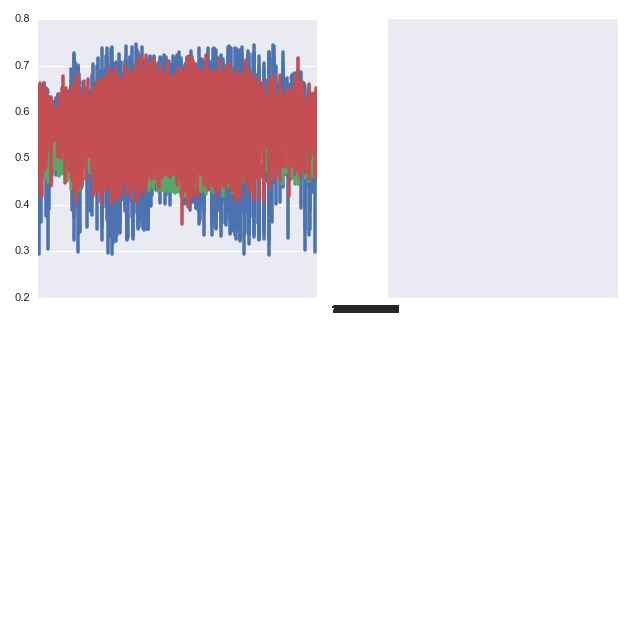

KeyboardInterrupt: 

In [42]:
sns.factorplot(data=plot_df, y='predicted_responses', col='v123_label', x='', 
               col_wrap=2, hue='image_type')